In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 75)

from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller

# EDA

In [2]:
df = pd.read_csv('../data/raw/dataset_with_raw_data.csv', parse_dates=True, index_col=0)

In [3]:
df.columns.values

array(['lme_price', 'lme_price_3features', 'lme_volume',
       'bloomberg_metals_price', 'bloomberg_metals_change', 'ftse_index',
       'ftse_index_change', 'sp_metals_price', 'sp_metals_change',
       'mosexchange_price', 'mosexchange_change', 'baltic_dry_index',
       'baltic_dry_index_change', 'usd_clp_price', 'usd_clp_change',
       'usd_cny_price', 'usd_cny_change', 'usd_jpy_price',
       'usd_jpy_change', 'usd_eur_price', 'usd_eur_change',
       'usd_rub_price', 'usd_rub_change', 'dxy_price', 'dxy_change',
       'chalco_price', 'chalco_volume', 'hongqiao_price',
       'hongqiao_volume', 'norsk_hydro_price', 'norsk_hydro_volume',
       'rusal_price', 'rusal_volume', 'alcoa_price', 'alcoa_volume',
       'kaiser_price', 'kaiser_volume', 'australia_fed_rate_value',
       'brazil_pmi_value', 'brazil_inflation_value',
       'brazil_fed_rate_value', 'china_gdp_value', 'china_pmi_value',
       'china_inflation_value', 'china_fed_rate_value',
       'china_composite_pmi_valu

In [4]:
df.describe()

lme_price  lme_price_3features    lme_volume  bloomberg_metals_price  \
count  1661.000000          1661.000000  1.661000e+03             1656.000000   
mean   2179.860325          2198.625226  9.972056e+05              138.611075   
std     413.162817           408.281153  4.076906e+05               25.072938   
min    1421.500000          1459.500000  2.714500e+05               90.000000   
25%    1851.000000          1866.000000  5.618250e+05              117.397500   
50%    2165.000000          2188.500000  1.064450e+06              137.305000   
75%    2384.000000          2402.500000  1.301625e+06              155.855000   
max    3984.500000          3968.000000  1.967275e+06              239.050000   

       bloomberg_metals_change    ftse_index  ftse_index_change  \
count              1656.000000   1593.000000        1593.000000   
mean                  0.019281  11580.095323          -0.004739   
std                   1.243864   1978.916464           1.337639   
min                  -4.370000   8236.330000          -9.150000   
25%                  -0.750000  10093.800000          -0.740000   
50%                   0.060000  11165.810000          -0.040000   
75%                   0.750000  12869.690000           0.760000   
max                  11.280000  16404.350000           6.340000   

       sp_metals_price  sp_metals_change  mosexchange_price  \
count      1654.000000       1654.000000        1621.000000   
mean       2013.524365          0.067878        7764.628526   
std         619.535337          2.150520        1899.791539   
min         732.300000        -15.120000        4509.190000   
25%        1462.775000         -1.070000        6234.930000   
50%        1926.700000          0.110000        7253.580000   
75%        2548.500000          1.250000        8908.910000   
max        3362.900000         12.500000       12192.640000   

       mosexchange_change  baltic_dry_index  baltic_dry_index_change  \
count         1621.000000       1635.000000              1635.000000   
mean             0.034985       1677.477676                 0.071957   
std              1.529853        830.300612                 3.522314   
min            -27.690000        393.000000               -17.490000   
25%             -0.560000       1159.000000                -1.910000   
50%              0.070000       1504.000000                -0.060000   
75%              0.690000       1999.000000                 1.800000   
max             17.440000       5650.000000                22.550000   

       usd_clp_price  usd_clp_change  usd_cny_price  usd_cny_change  \
count    1695.000000     1695.000000    1680.000000     1680.000000   
mean      777.626501        0.024614       6.802120        0.005738   
std        97.684053        0.882954       0.298954        0.277670   
min       587.730000       -7.430000       6.269000       -1.610000   
25%       696.615000       -0.480000       6.493300       -0.130000   
50%       786.210000        0.010000       6.853800        0.000000   
75%       844.915000        0.510000       7.061525        0.130000   
max      1049.300000        4.010000       7.343000        1.590000   

       usd_jpy_price  usd_jpy_change  usd_eur_price  usd_eur_change  \
count    1696.000000     1696.000000    1696.000000     1696.000000   
mean      120.082653        0.021203       0.891511        0.006486   
std        15.883258        0.522488       0.046554        0.445910   
min       102.340000       -3.780000       0.799400       -2.100000   
25%       108.590000       -0.222500       0.853200       -0.250000   
50%       111.345000        0.025000       0.891400        0.000000   
75%       134.355000        0.280000       0.921325        0.262500   
max       158.330000        3.210000       1.042100        2.090000   

       usd_rub_price  usd_rub_change    dxy_price   dxy_change  chalco_price  \
count    1647.000000     1647.000000  1696.000000  1696.000000   1618.000000   
mean       72.5269

In [5]:
df.filter(like='volume').describe().columns.values

array(['lme_volume', 'chalco_volume', 'hongqiao_volume',
       'norsk_hydro_volume', 'rusal_volume', 'alcoa_volume',
       'kaiser_volume'], dtype=object)

In [6]:
# В данных замечено небанальное значение минимума для объема торгов акциями компании Rusal и Hongqiao
# (в общем фрейме атрибут rusal_volume и hongqiao_volume)
for i in df.filter(like='volume').describe().columns.values:
    df[i] = df[i].replace(0, df[i].median())

# Заменим нулевые значения медианой данного атрибута для всех признаков "объем торгов"
# Почему не скользящим средним, как предложил куратор Сергей? Параметр объема торгов ведет себя буквально рандомно, поэтому медиана

In [7]:
# Просмотрим долю пропусков
(df.isna().sum()/len(df)).sort_values()

dxy_price                    0.294509
usd_eur_price                0.294509
usd_jpy_change               0.294509
usd_jpy_price                0.294509
dxy_change                   0.294509
usd_eur_change               0.294509
usd_clp_change               0.294925
usd_clp_price                0.294925
usd_cny_change               0.301165
usd_cny_price                0.301165
lme_price                    0.309068
lme_volume                   0.309068
lme_price_3features          0.309068
bloomberg_metals_change      0.311148
bloomberg_metals_price       0.311148
sp_metals_change             0.311980
sp_metals_price              0.311980
kaiser_price                 0.311980
kaiser_volume                0.311980
alcoa_volume                 0.311980
alcoa_price                  0.311980
norsk_hydro_price            0.314476
norsk_hydro_volume           0.314476
usd_rub_price                0.314892
usd_rub_change               0.314892
baltic_dry_index_change      0.319884
baltic_dry_i

In [8]:
# Множество признаков имеет пропущенные значения, но вызвано это природой этих параметров,
# многие параметры носят ежемесячный характер, потому и возникает такое количество
# пропущенных значений в ежедневном масштабе

<Axes: ylabel='date'>

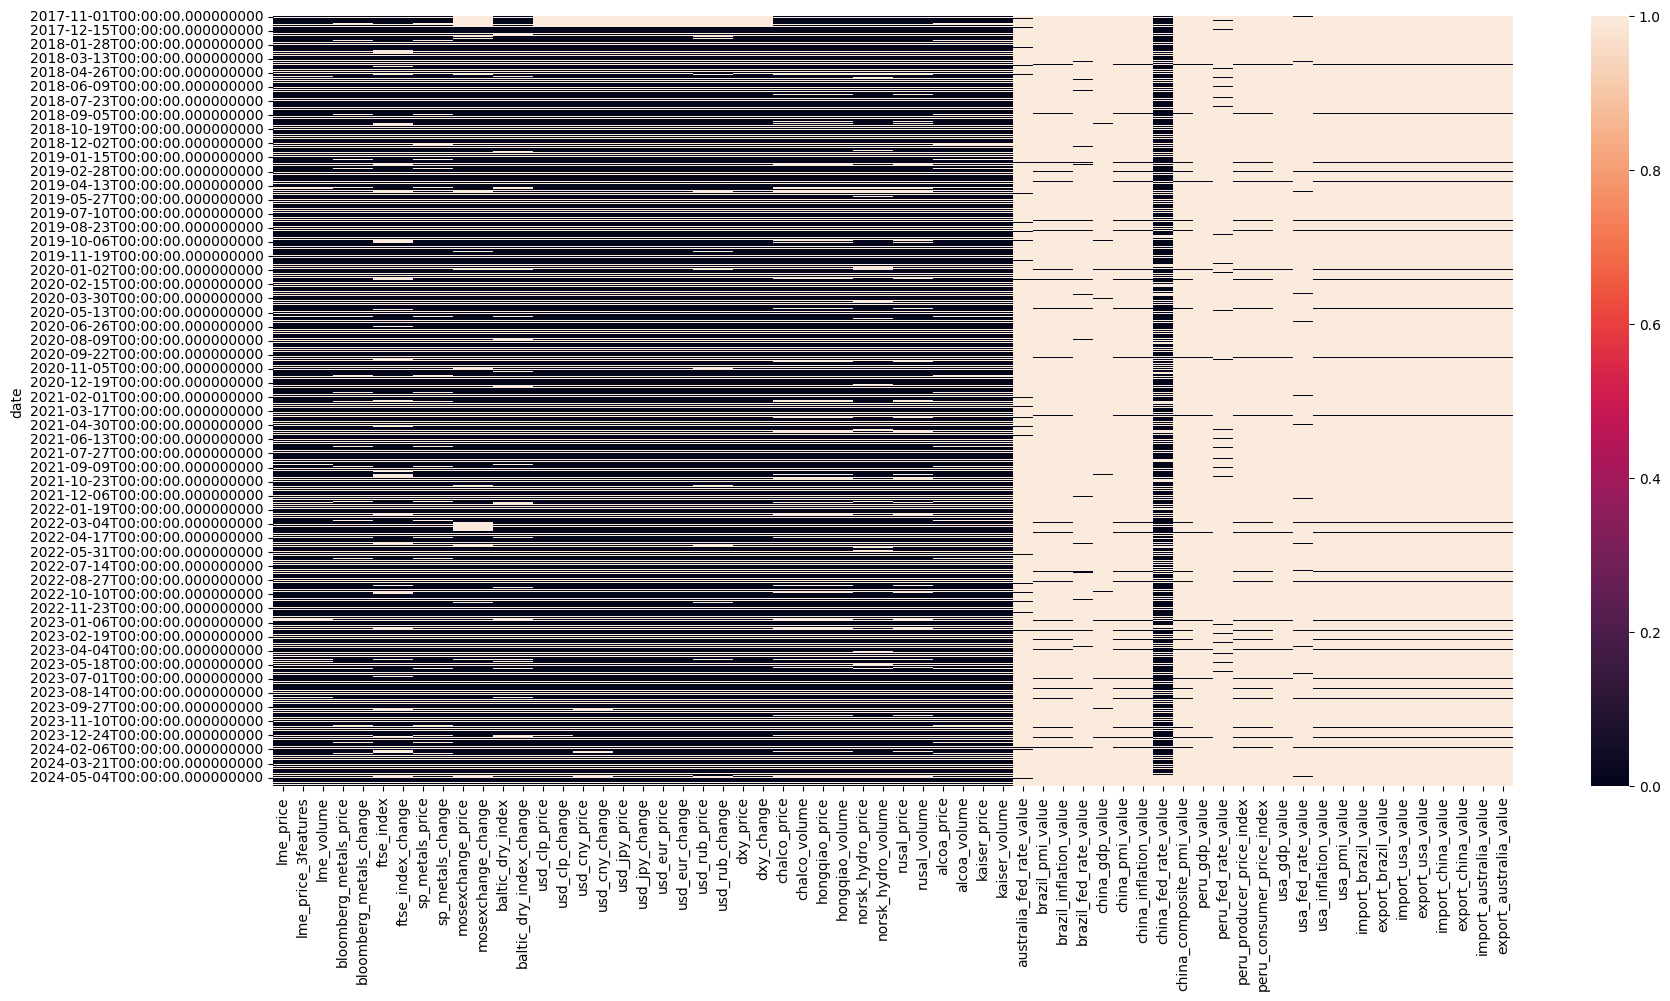

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

В некоторых колонках значение выпало на выходной (обычно это данные, которые обновляются помесячно и записываются в первый или последний день месяца)  
Можно интерполировать во времени в том числе и для выходных, все равно впоследствии будет произведен переход на еженедельные данные с агрегацией среднего или медианы, что не вызовет искажения в распределении данных

In [10]:
df.columns.values

array(['lme_price', 'lme_price_3features', 'lme_volume',
       'bloomberg_metals_price', 'bloomberg_metals_change', 'ftse_index',
       'ftse_index_change', 'sp_metals_price', 'sp_metals_change',
       'mosexchange_price', 'mosexchange_change', 'baltic_dry_index',
       'baltic_dry_index_change', 'usd_clp_price', 'usd_clp_change',
       'usd_cny_price', 'usd_cny_change', 'usd_jpy_price',
       'usd_jpy_change', 'usd_eur_price', 'usd_eur_change',
       'usd_rub_price', 'usd_rub_change', 'dxy_price', 'dxy_change',
       'chalco_price', 'chalco_volume', 'hongqiao_price',
       'hongqiao_volume', 'norsk_hydro_price', 'norsk_hydro_volume',
       'rusal_price', 'rusal_volume', 'alcoa_price', 'alcoa_volume',
       'kaiser_price', 'kaiser_volume', 'australia_fed_rate_value',
       'brazil_pmi_value', 'brazil_inflation_value',
       'brazil_fed_rate_value', 'china_gdp_value', 'china_pmi_value',
       'china_inflation_value', 'china_fed_rate_value',
       'china_composite_pmi_valu

In [11]:
# Для ежемесячных и еженедедельных данных, отражающих прошедший период, используем заполнение пропусков с помощью bfill()
# Для ежедневных данных, прерывающихся преимущественно по выходным, используем линейную интерполяцию с методом 'time',
# чтобы данные заполнялись с учетом дня

In [12]:
df_bfill = df.loc[:,('australia_fed_rate_value', 'brazil_pmi_value', 'brazil_inflation_value',
                     'brazil_fed_rate_value', 'china_gdp_value', 'china_pmi_value',
                     'china_inflation_value', 'china_fed_rate_value',
                     'china_composite_pmi_value', 'peru_gdp_value',
                     'peru_fed_rate_value', 'peru_producer_price_index',
                     'peru_consumer_price_index', 'usa_gdp_value', 'usa_fed_rate_value',
                     'usa_inflation_value', 'usa_pmi_value', 'import_brazil_value',
                     'export_brazil_value', 'import_usa_value', 'export_usa_value',
                     'import_china_value', 'export_china_value',
                     'import_australia_value', 'export_australia_value')].bfill()

In [13]:
df_interpol = df.loc[:,('lme_price', 'lme_price_3features', 'lme_volume',
                        'bloomberg_metals_price', 'bloomberg_metals_change',
                        'ftse_index', 'ftse_index_change', 'sp_metals_price', 'sp_metals_change',
                        'mosexchange_price', 'mosexchange_change', 'baltic_dry_index', 'baltic_dry_index_change',
                        'usd_clp_price', 'usd_clp_change', 'usd_cny_price', 'usd_cny_change',
                        'usd_jpy_price', 'usd_jpy_change', 'usd_eur_price', 'usd_eur_change',
                        'usd_rub_price', 'usd_rub_change', 'dxy_price', 'dxy_change',
                        'chalco_price', 'chalco_volume', 'hongqiao_price', 'hongqiao_volume',
                        'norsk_hydro_price', 'norsk_hydro_volume', 'rusal_price', 'rusal_volume',
                        'alcoa_price', 'alcoa_volume',
                        'kaiser_price', 'kaiser_volume')].interpolate(method='time', limit_area='inside')

In [14]:
df_after_fillna = pd.concat([df_interpol, df_bfill], axis=1)

In [15]:
df_after_fillna.isna().sum()[df_after_fillna.isna().sum()!=0]

mosexchange_price             30
mosexchange_change            30
usd_clp_price                 30
usd_clp_change                30
usd_cny_price                 30
usd_cny_change                30
usd_jpy_price                 30
usd_jpy_change                30
usd_eur_price                 30
usd_eur_change                30
usd_rub_price                 30
usd_rub_change                30
dxy_price                     30
dxy_change                    30
chalco_price                   1
chalco_volume                  1
hongqiao_price                 1
hongqiao_volume                1
norsk_hydro_price              1
norsk_hydro_volume             1
rusal_price                    1
rusal_volume                   1
alcoa_price                    1
alcoa_volume                   1
kaiser_price                   1
kaiser_volume                  1
australia_fed_rate_value      24
brazil_pmi_value              31
brazil_fed_rate_value         23
china_gdp_value               61
china_pmi_

<Axes: ylabel='date'>

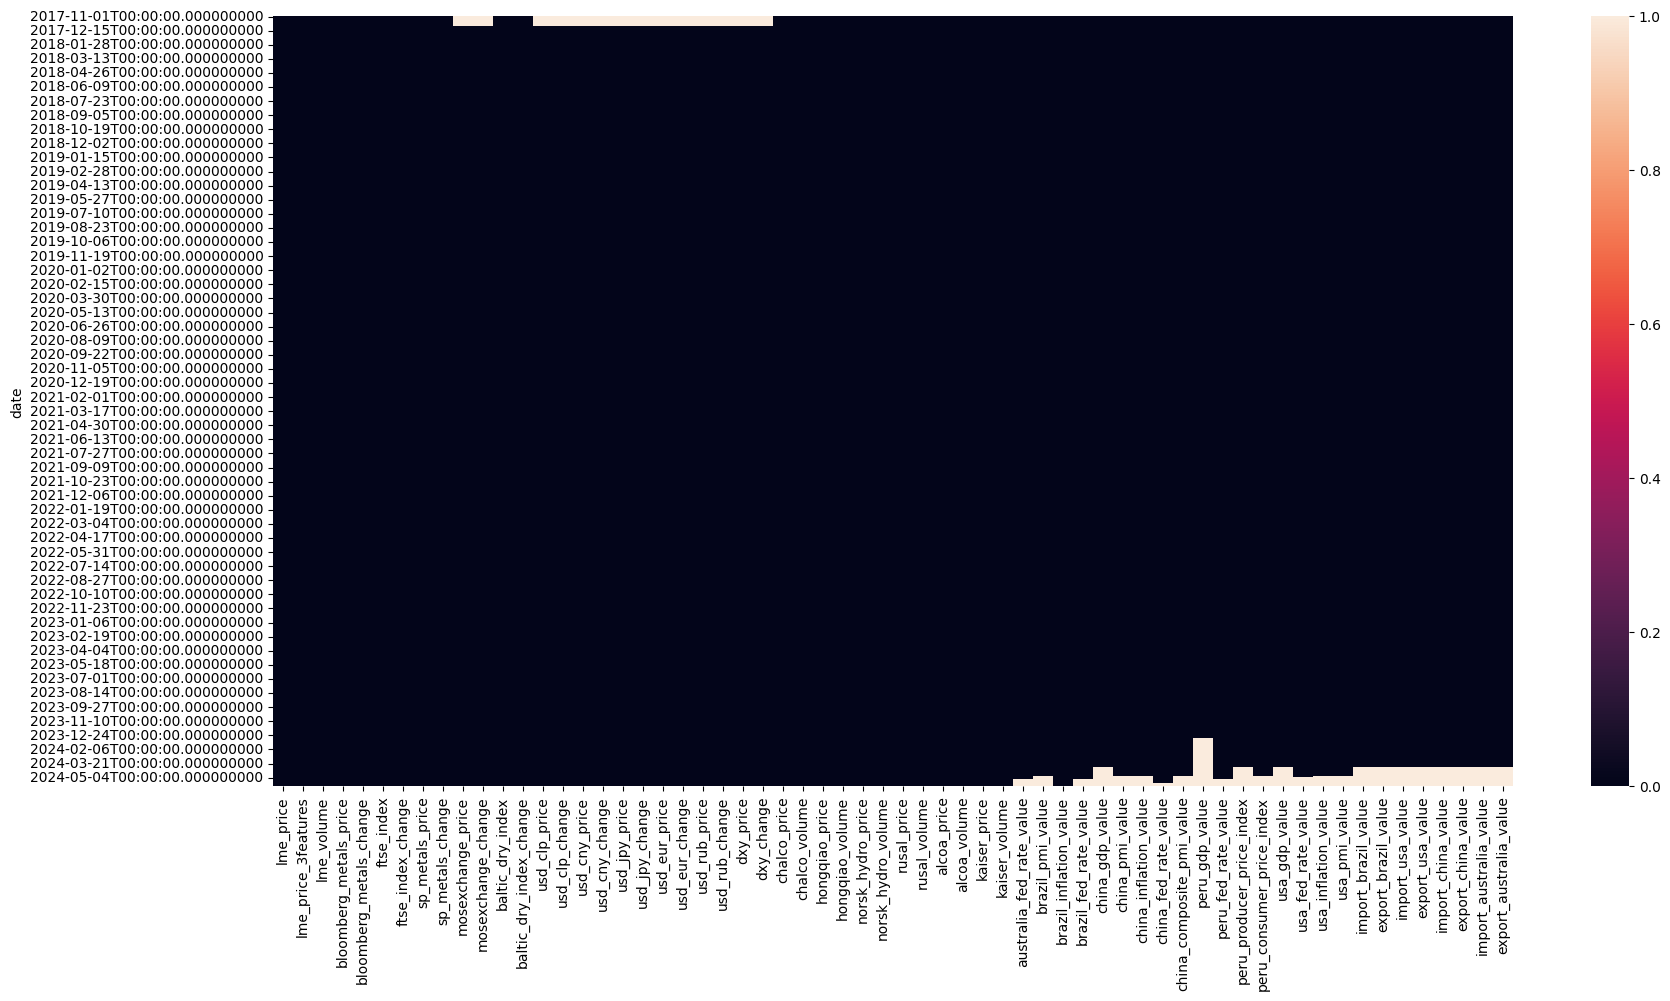

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df_after_fillna.isna())

In [29]:
df_after_fillna.isna().sum()[df_after_fillna.isna().sum()!=0].sort_values(ascending=False).head(20)

peru_gdp_value               152
export_australia_value        61
import_australia_value        61
export_china_value            61
import_china_value            61
export_usa_value              61
import_usa_value              61
export_brazil_value           61
import_brazil_value           61
china_gdp_value               61
usa_gdp_value                 61
peru_producer_price_index     61
china_pmi_value               31
china_inflation_value         31
china_composite_pmi_value     31
usa_inflation_value           31
peru_consumer_price_index     31
usa_pmi_value                 31
brazil_pmi_value              31
usa_fed_rate_value            30
dtype: int64

In [31]:
# Можно заметить, что пустыми остались данные, которые на момент обновленного сбора данных (31 мая) отсутствовали, то есть поступают с задержкой
# Некоторые данные поступают с слишком большой задержкой
# Заметим, что лаг для 'peru_gdp_value', 'china_gdp_value', 'usa_gdp_value' слишком велик
# при смещении мы потеряем много данных от тренировочного набора
df_after_fillna.drop(columns=['peru_gdp_value', 'china_gdp_value', 'usa_gdp_value'], inplace=True)

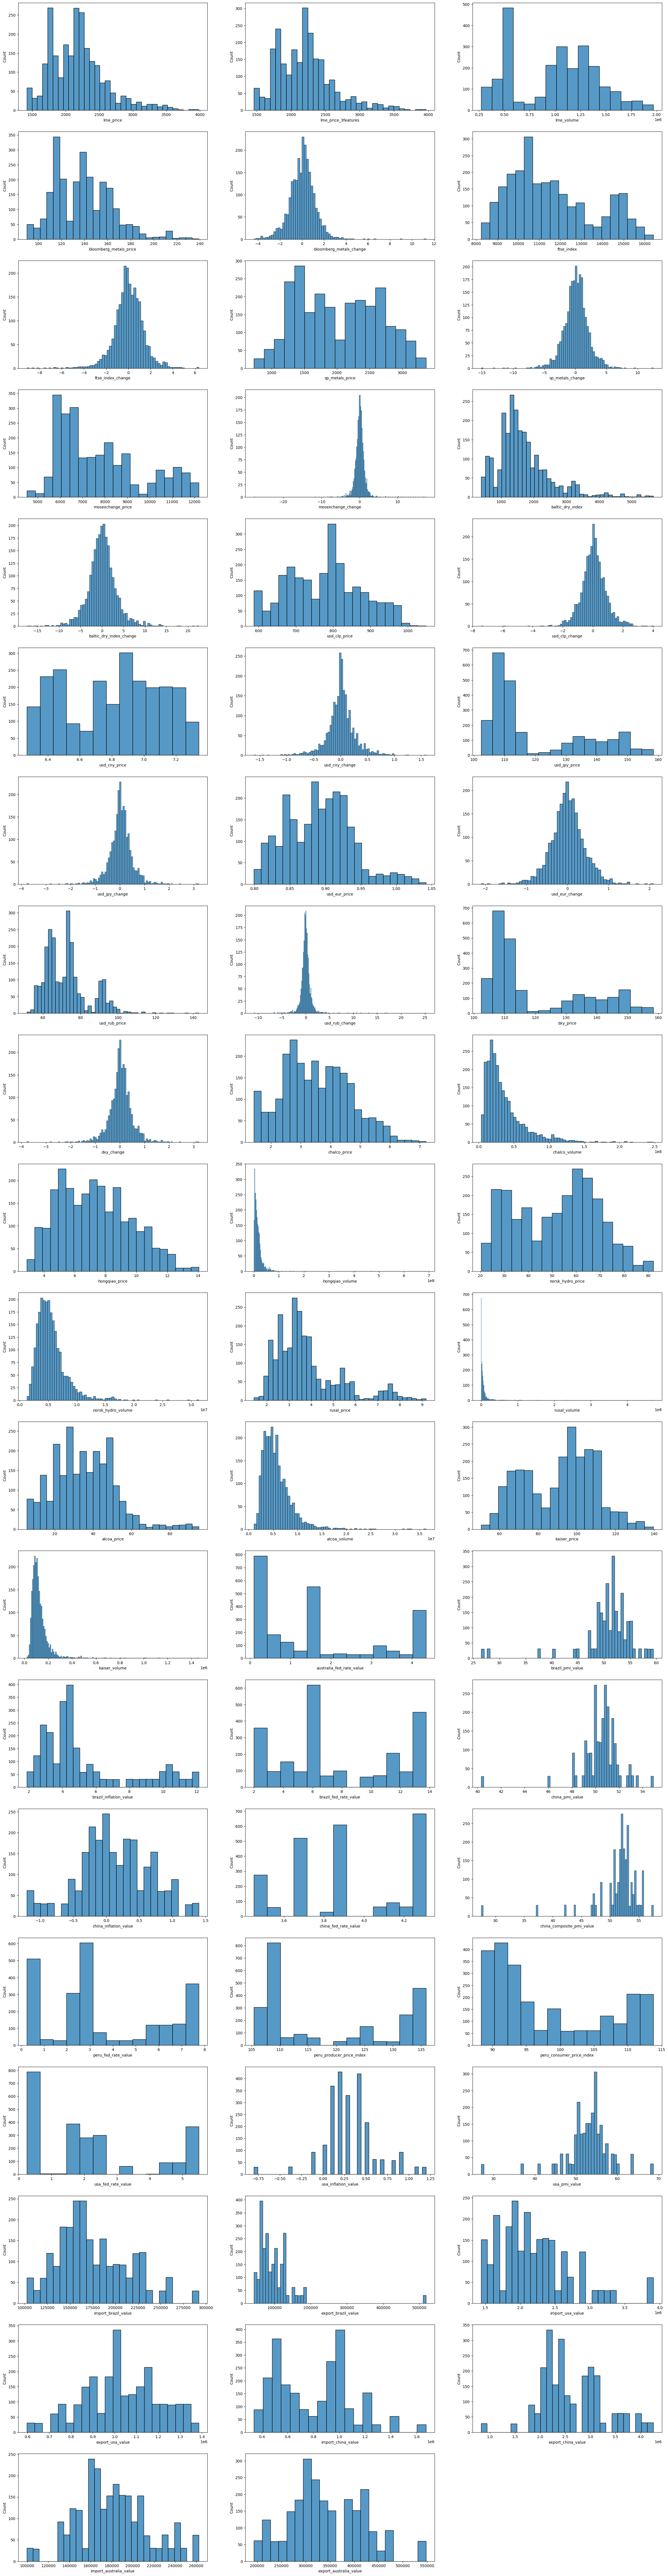

In [34]:
fig = plt.figure(figsize=(30,120))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)
k=1
for i in df_after_fillna.columns:
    plt.subplot(20,3,k)
    sns.histplot(df_after_fillna, x=str(i))
    #plt.title(i)
    k+=1
# plt.savefig('distributions.png', dpi=400)

In [18]:
# Анализ гистограмм распределения параметров позволяет сделать вывод, что данные извлечены без ошибок,
# выбросов нет, диапазоны значений кондиционные.
# Некоторые данные можно логарифмировать
# Например:

In [37]:
list_for_logarithm = df_after_fillna.filter(like='volume').columns.values

In [38]:
for i in list_for_logarithm:
    df_after_fillna['log10_'+i] = np.log10(df_after_fillna[i])

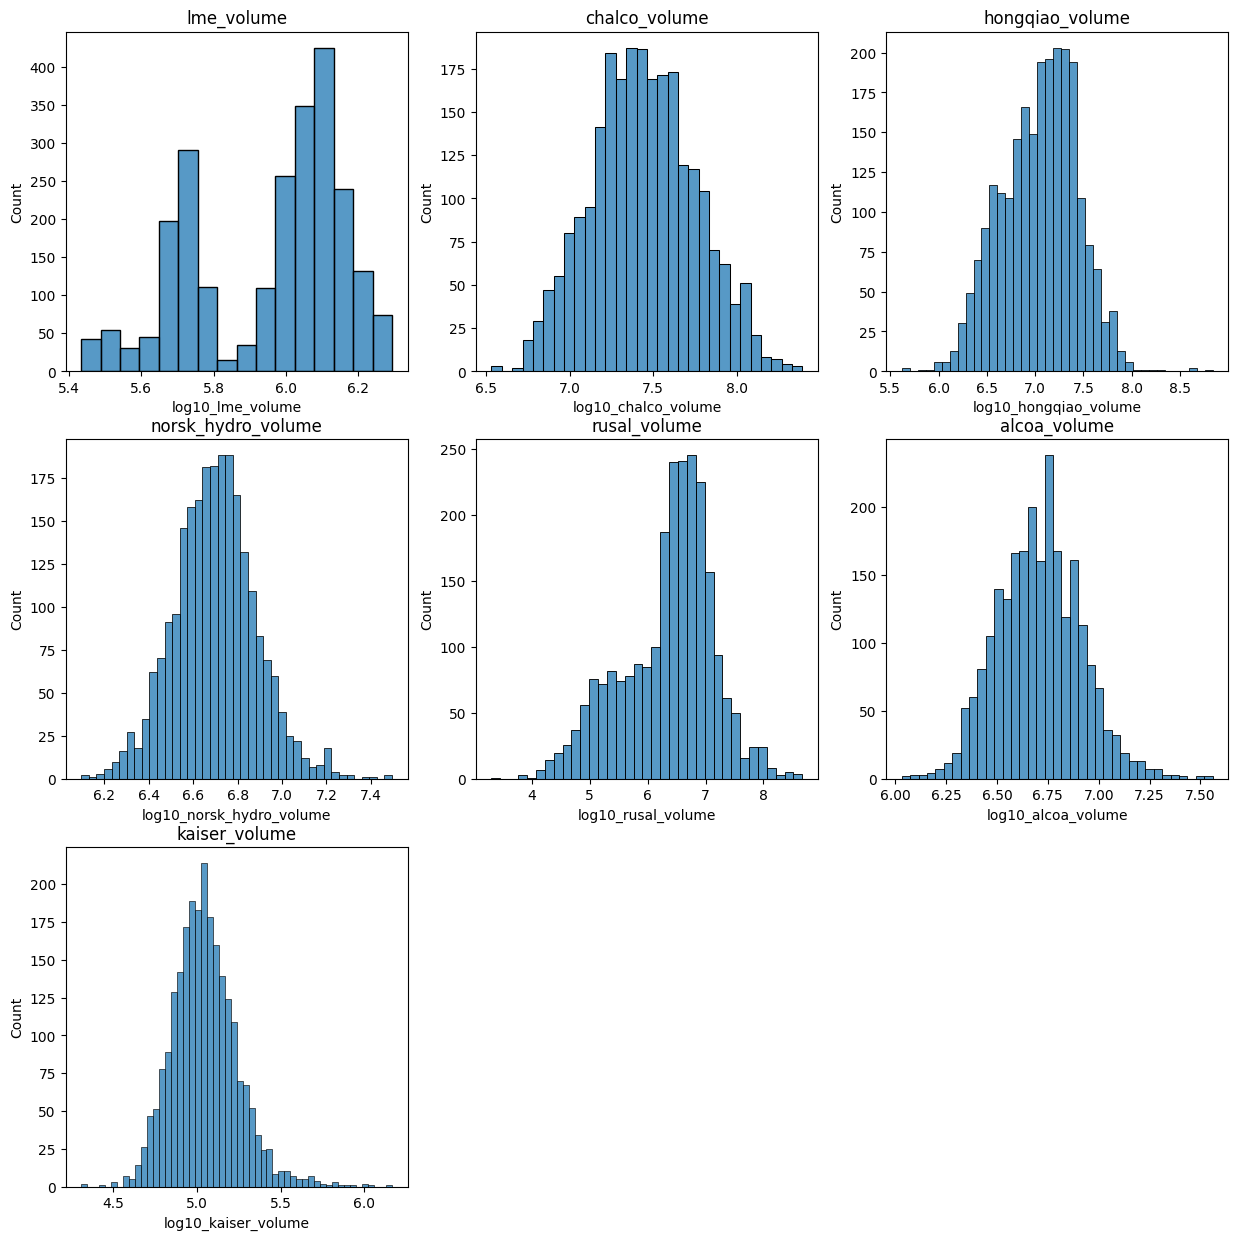

In [40]:
fig = plt.figure(figsize=(15,15))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)
k=1
for i in list_for_logarithm:
    plt.subplot(3,3,k)
    sns.histplot(df_after_fillna['log10_'+i])
    plt.title(i)
    k+=1

In [41]:
df_after_fillna.columns

Index(['lme_price', 'lme_price_3features', 'lme_volume',
       'bloomberg_metals_price', 'bloomberg_metals_change', 'ftse_index',
       'ftse_index_change', 'sp_metals_price', 'sp_metals_change',
       'mosexchange_price', 'mosexchange_change', 'baltic_dry_index',
       'baltic_dry_index_change', 'usd_clp_price', 'usd_clp_change',
       'usd_cny_price', 'usd_cny_change', 'usd_jpy_price', 'usd_jpy_change',
       'usd_eur_price', 'usd_eur_change', 'usd_rub_price', 'usd_rub_change',
       'dxy_price', 'dxy_change', 'chalco_price', 'chalco_volume',
       'hongqiao_price', 'hongqiao_volume', 'norsk_hydro_price',
       'norsk_hydro_volume', 'rusal_price', 'rusal_volume', 'alcoa_price',
       'alcoa_volume', 'kaiser_price', 'kaiser_volume',
       'australia_fed_rate_value', 'brazil_pmi_value',
       'brazil_inflation_value', 'brazil_fed_rate_value', 'china_pmi_value',
       'china_inflation_value', 'china_fed_rate_value',
       'china_composite_pmi_value', 'peru_fed_rate_value',

In [46]:
drop = ['alcoa_volume', 'chalco_volume', 'lme_volume', 'hongqiao_volume', 'kaiser_volume',
        'norsk_hydro_volume', 'rusal_volume']
df_after_fillna.drop(columns=drop, inplace=True)

In [23]:
# Анализ на выбросы
# ftse_index, mosexchange_value, log10_lme_volume

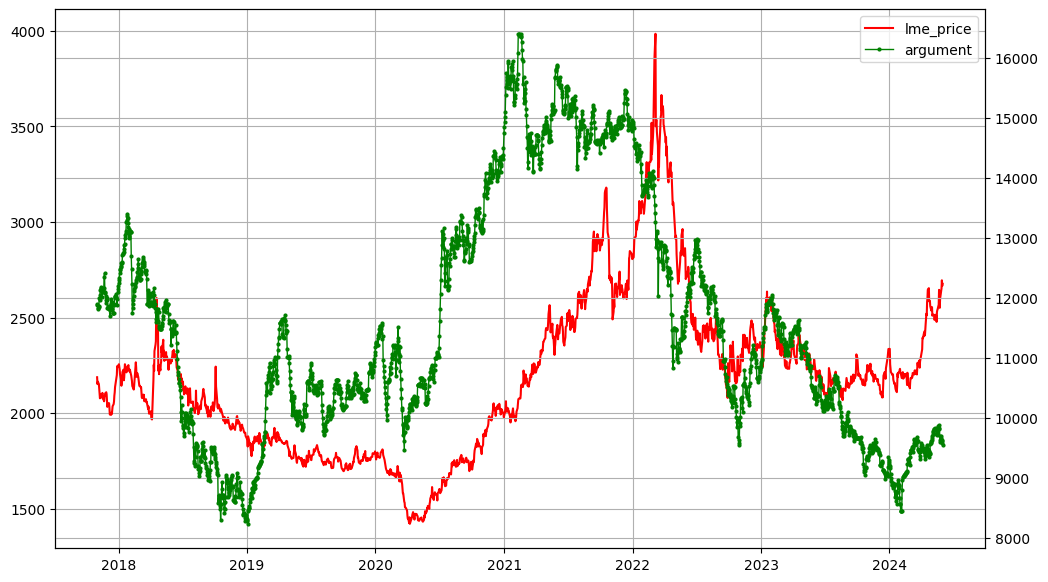

In [47]:
fig, ax = plt.subplots(figsize=(12, 7))
l1, = ax.plot(df_after_fillna.index.values, df_after_fillna.lme_price.values, color='r')
ax1 = ax.twinx()
l2, = ax1.plot(df_after_fillna.index.values, df_after_fillna.ftse_index, color='g', marker='o', linewidth=1, markersize=2)
ax1.legend([l1,l2],['lme_price', 'argument'])
#ax1.set_ylim([0,1e6])
ax.grid(True)
ax1.grid(True)

In [48]:
# Можно сгладить кривую стоимости
df_after_fillna['lme_price_smooth'] = df_after_fillna.lme_price.rolling(7, min_periods=1).mean()

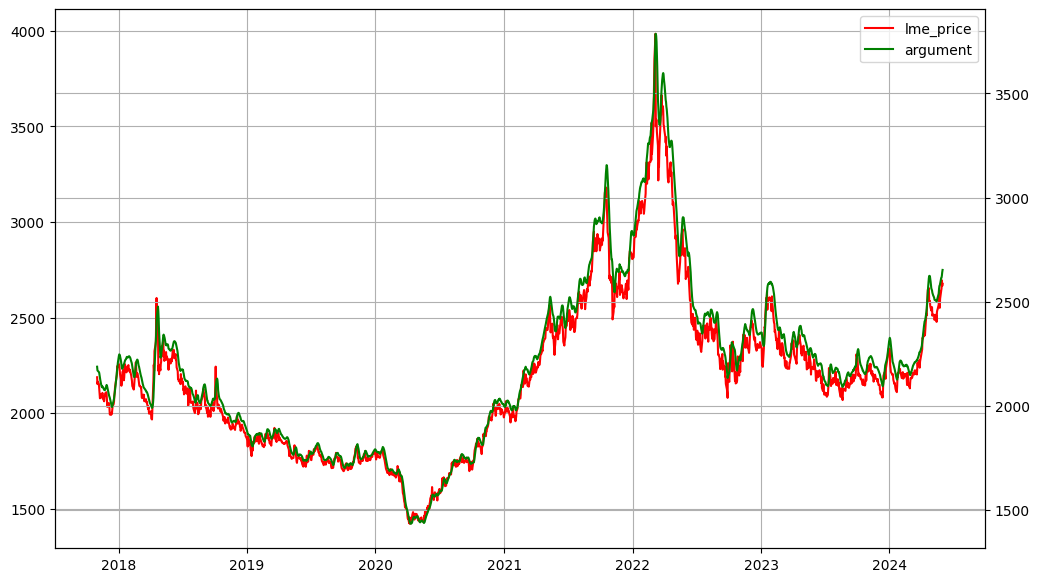

In [49]:
fig, ax = plt.subplots(figsize=(12, 7))
l1, = ax.plot(df_after_fillna.index.values, df_after_fillna.lme_price.values, color='r')
ax1 = ax.twinx()
l2, = ax1.plot(df_after_fillna.index.values, df_after_fillna.lme_price_smooth, color='g')
ax1.legend([l1,l2],['lme_price', 'argument'])
#ax1.set_ylim([0,1e6])
ax.grid(True)
ax1.grid(True)

In [50]:
# Произведем агрегацию данных в недельные дискреты
dataset_per_week = df_after_fillna.reset_index().groupby([pd.Grouper(key='date', freq='W')]).mean()

In [51]:
dataset_per_week

lme_price  lme_price_3features  bloomberg_metals_price  \
date                                                                   
2017-11-05  2164.400000          2180.700000              134.136000   
2017-11-12  2106.357143          2122.428571              131.684286   
2017-11-19  2084.928571          2101.785714              129.567143   
2017-11-26  2088.857143          2104.571429              131.468571   
2017-12-03  2064.285714          2079.928571              128.751429   
...                 ...                  ...                     ...   
2024-05-05  2527.660714          2559.178571              157.558571   
2024-05-12  2506.875000          2548.964286              158.235714   
2024-05-19  2530.214286          2582.571429              165.225714   
2024-05-26  2603.785714          2656.071429              166.702143   
2024-06-02  2666.000000          2711.700000              164.995000   

            bloomberg_metals_change    ftse_index  ftse_index_change  \
date                                                                   
2017-11-05                 0.228000  11854.586000          -0.140000   
2017-11-12                -0.192857  12047.808571           0.530000   
2017-11-19                 0.005714  12112.500000           0.032857   
2017-11-26                 0.457143  12162.222857          -0.205714   
2017-12-03                -0.270000  11890.172857          -0.291429   
...                             ...           ...                ...   
2024-05-05                 0.287143   9700.185000           1.138929   
2024-05-12                 0.340000   9806.114286           0.248571   
2024-05-19                 1.517143   9799.045714           0.217143   
2024-05-26                -0.091071   9729.788571          -0.361429   
2024-06-02                -0.155500   9618.066000          -0.074000   

            sp_metals_price  sp_metals_change  mosexchange_price  \
date                                                               
2017-11-05      1585.100000          0.054000                NaN   
2017-11-12      1556.200000         -0.488571                NaN   
2017-11-19      1527.171429          0.220000                NaN   
2017-11-26      1561.164286          0.312857                NaN   
2017-12-03      1583.185714          0.405714        5685.746667   
...                     ...               ...                ...   
2024-05-05      3091.628571          0.231429        8854.146429   
2024-05-12      3147.028571          0.118571        8946.301429   
2024-05-19      3240.014286          1.007143        9109.045714   
2024-05-26      3268.403571          0.170357        9035.395714   
2024-06-02      3274.445000          0.608500        8534.560000   

            mosexchange_change  baltic_dry_index  baltic_dry_index_change  \
date                                                                        
2017-11-05                 NaN       1480.600000                -0.730000   
2017-11-12                 NaN       1470.000000                -0.465714   
2017-11-19                 NaN       1387.428571                -0.678571   
2017-11-26                 NaN       1433.142857                 1.198571   
2017-12-03           -0.243333       1573.000000                 2.324286   
...                        ...               ...                      ...   
2024-05-05           -0.128571       1802.035714                 3.484286   
2024-05-12            0.567857       2115.321429                 2.634286   
2024-05-19            0.268571       1900.000000                -1.768571   
2024-05-26           -1.070000       1808.178571                -0.432143   
2024-06-02           -1.790000       1795.450000                 0.097000   

            usd_clp_price  usd_clp_change  usd_cny_price  usd_cny_change  \
date                                                                       
2017-11-05            NaN             NaN            NaN             NaN   
2017-11-12            NaN

In [54]:
dataset_per_week.isna().sum()[dataset_per_week.isna().sum()>1].sort_values(ascending=False)


export_australia_value       9
import_australia_value       9
export_china_value           9
import_china_value           9
export_usa_value             9
import_usa_value             9
export_brazil_value          9
import_brazil_value          9
peru_producer_price_index    9
mosexchange_change           4
usa_pmi_value                4
usa_inflation_value          4
usa_fed_rate_value           4
peru_consumer_price_index    4
china_composite_pmi_value    4
china_inflation_value        4
mosexchange_price            4
usd_eur_change               4
usd_eur_price                4
usd_clp_price                4
usd_clp_change               4
usd_cny_price                4
usd_cny_change               4
usd_jpy_price                4
usd_jpy_change               4
china_pmi_value              4
brazil_pmi_value             4
usd_rub_price                4
usd_rub_change               4
dxy_price                    4
dxy_change                   4
peru_fed_rate_value          3
australi

In [55]:
# Соберем словарь для всех смещений
# Лучше собрать вручную, так как это рыночные данные
dict_for_shift = {
    "export_brazil_value":9,
    "import_brazil_value":9,
    "export_usa_value": 9,
    "import_usa_value": 9,
    "export_china_value": 9,
    "import_china_value": 9,
    "export_australia_value":9,
    "import_australia_value":9,
    "peru_producer_price_index":9,
    "peru_consumer_price_index":5,
    "peru_fed_rate_value":5,
    "usa_pmi_value":5,
    "usa_inflation_value":5,
    "usa_fed_rate_value":5,
    "china_composite_pmi_value":5,
    "china_inflation_value":5,
    "china_pmi_value":5,
    "brazil_pmi_value":5,
    "brazil_fed_rate_value":5,
    "australia_fed_rate_value":5
}

In [56]:
# Вводим смещения
for i in dict_for_shift.items():
    dataset_per_week[i[0]] = dataset_per_week[i[0]].shift(i[1])

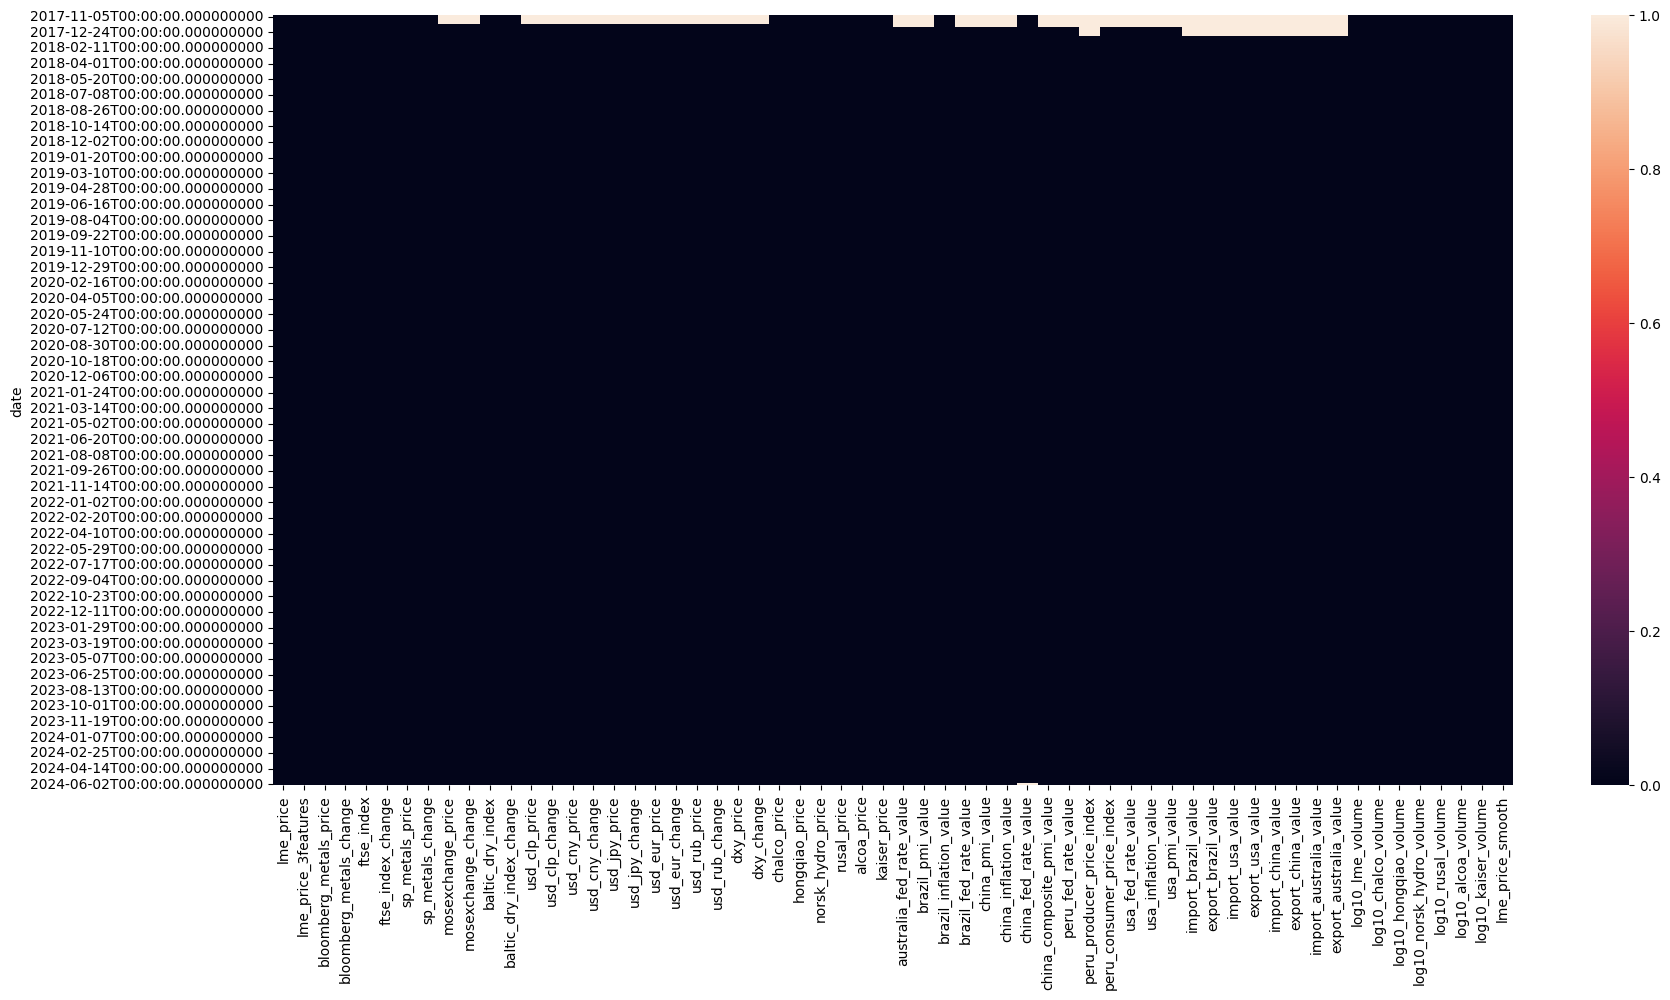

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset_per_week.isna());

In [60]:
# Удаляем строки, в которые вылезли Nan из-за смещения и последнюю "недонеделю"
dataset_per_week = dataset_per_week.iloc[:-1]
dataset_per_week.dropna(inplace=True)
dataset_per_week.shape

/var/folders/pn/jjf7znn915ddp99mdt4lhzgr0000gn/T/ipykernel_27053/3688235835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_per_week.dropna(inplace=True)


(334, 60)

In [61]:
dataset_per_week = dataset_per_week.copy()

In [33]:
# Пересмотрим 
# ftse_index, mosexchange_value, log10_lme_volume

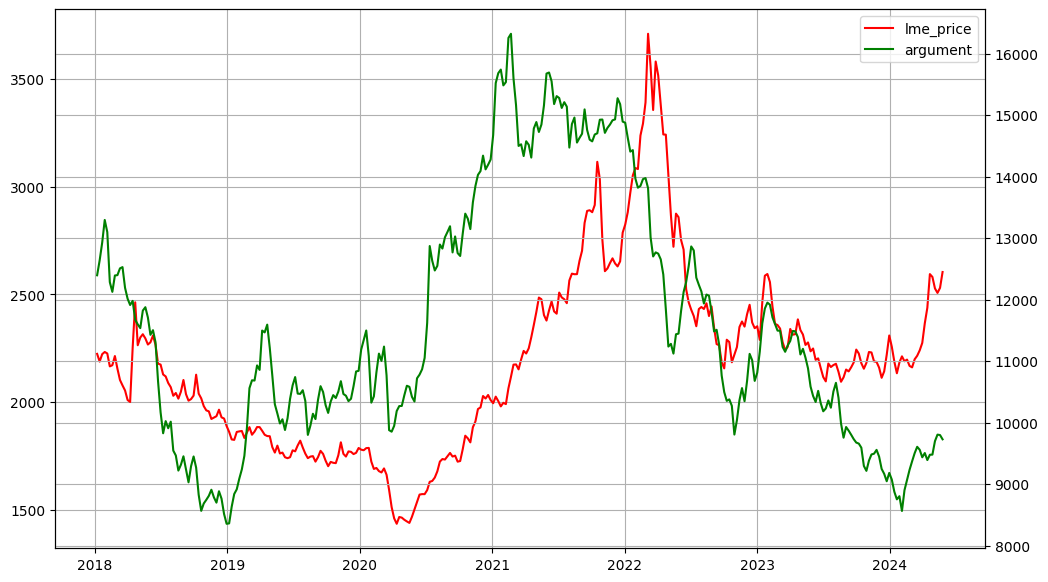

In [62]:
fig, ax = plt.subplots(figsize=(12, 7))
l1, = ax.plot(dataset_per_week.index.values, dataset_per_week.lme_price.values, color='r')
ax1 = ax.twinx()
l2, = ax1.plot(dataset_per_week.index.values, dataset_per_week.ftse_index, color='g')
ax1.legend([l1,l2],['lme_price', 'argument'])
#ax1.set_ylim([0,1e6])
ax.grid(True)
ax1.grid(True)

In [63]:
original_price = dataset_per_week[['lme_price']].copy(deep=True)
original_price.to_csv('../data/processed/original_price.csv')
dataset_per_week = dataset_per_week.drop(columns=['lme_price'])
dataset_per_week.to_csv('../data/processed/dataset_per_week_without_agg.csv')

In [64]:
dataset_per_week = pd.read_csv('../data/processed/dataset_per_week_without_agg.csv', parse_dates=True, index_col=0)
dataset_per_week.shape

(334, 59)

In [65]:
# Тест Дикки-Фуллера с alpha уровнем значимости
def check_stationarity(ts: list, alpha: float):
    dftest = adfuller(ts)
    adf, pvalue, critical_value = dftest[0], dftest[1], dftest[4]['5%']
    if (pvalue < alpha) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

In [66]:
check_stationarity(dataset_per_week.lme_price_smooth, 0.05)

The series is NOT stationary


In [67]:
# Задача прогнозирования на месяц подразумевает 4 прогноза (на одну, две, три и четыре недели вперед)
# Поэтому будем смещать таргет на одну, две, три и четыре позиции
# Заметим, что ряд цены на алюминий не прошел проверку на стационарность, ввиду чего лучше работать с дифференцированным рядом
dataset_per_week['target_1'] = dataset_per_week.lme_price_smooth.diff(periods=1)
dataset_per_week['target_2'] = dataset_per_week.lme_price_smooth.diff(periods=2)
dataset_per_week['target_3'] = dataset_per_week.lme_price_smooth.diff(periods=3)
dataset_per_week['target_4'] = dataset_per_week.lme_price_smooth.diff(periods=4)

In [70]:
# Проведем тест на стационарность для нового таргета с уровнем значимости 0.01
check_stationarity(dataset_per_week.target_1[1:], 0.01)
check_stationarity(dataset_per_week.target_2[2:], 0.01)
check_stationarity(dataset_per_week.target_3[3:], 0.01)
check_stationarity(dataset_per_week.target_4[4:], 0.01)

The series is stationary
The series is stationary
The series is stationary
The series is stationary


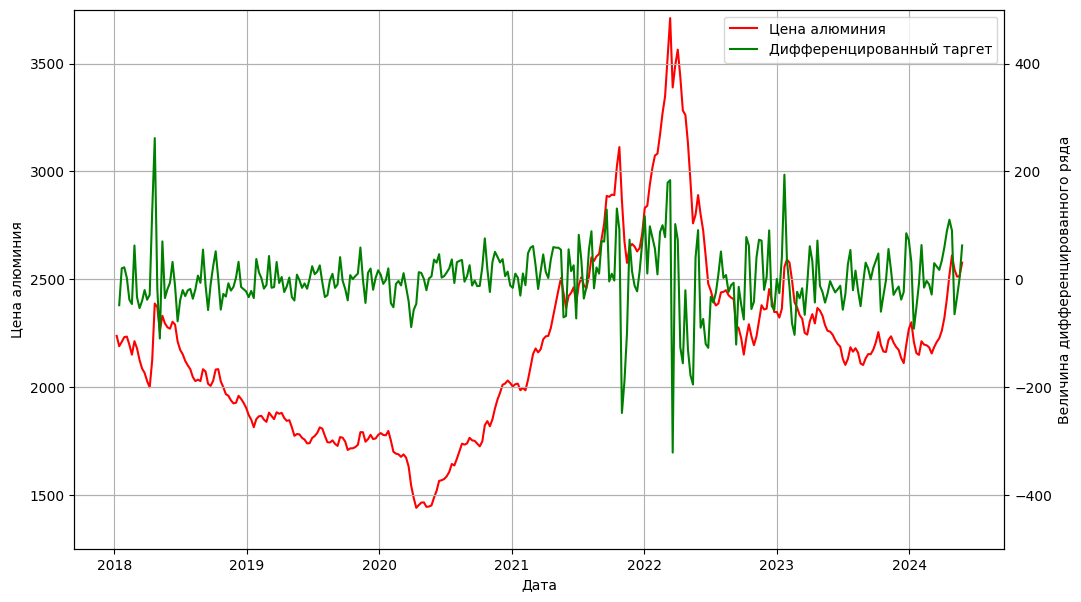

In [71]:
fig, ax = plt.subplots(figsize=(12, 7))
l1, = ax.plot(dataset_per_week.index, dataset_per_week.lme_price_smooth.values, color='r')
ax1 = ax.twinx()
l2, = ax1.plot(dataset_per_week.index, dataset_per_week.target_1.values, color='g')
ax1.legend([l1,l2],['Цена алюминия', 'Дифференцированный таргет'])
ax.set_ylim(1250,3750)
ax.set_ylabel('Цена алюминия')
ax.grid(True)
ax1.set_ylim(-500,500)
ax1.set_ylabel('Величина дифференцированного ряда')
ax1.grid(True)
ax.set_xlabel('Дата');

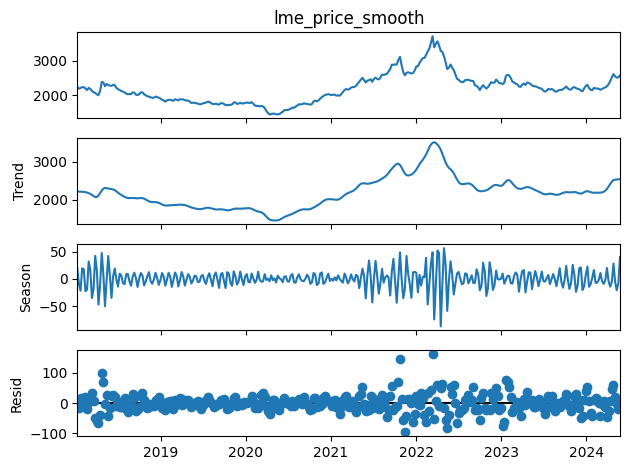

In [77]:
# Проанализируем таргет на тренд и сезонность с помощью алгоритма STL
stl = STL(dataset_per_week.lme_price_smooth, period=4) # Период 4 точек путем подбора "приемлемого разложения"
res = stl.fit()
fig = res.plot()

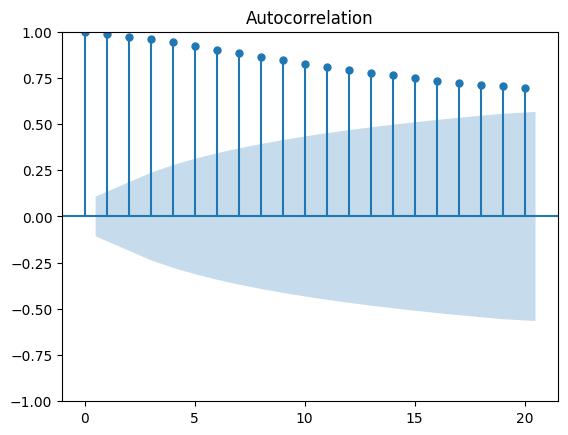

In [78]:
plot_acf(dataset_per_week.lme_price_smooth, lags = 20)
plt.show()

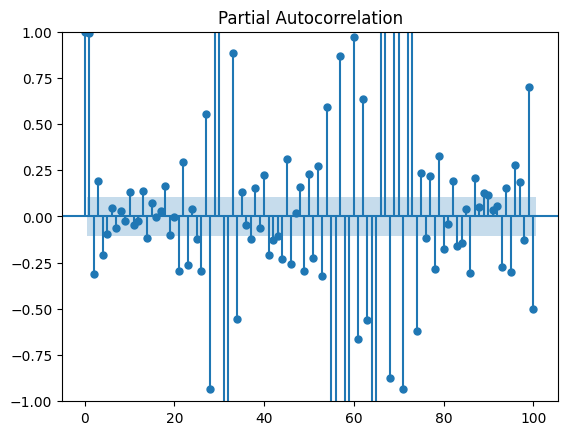

In [79]:
plot_pacf(dataset_per_week.lme_price_smooth, method='yw', lags = 100)
plt.show()

In [45]:
# Визуализируем ряды

In [80]:
dataset_per_week.describe().loc['mean'].sort_values()

ftse_index_change           -4.355218e-03
usd_eur_change               5.141146e-03
usd_cny_change               9.127459e-03
bloomberg_metals_change      2.036356e-02
usd_jpy_change               2.741660e-02
dxy_change                   2.741660e-02
usd_clp_change               5.409324e-02
usd_rub_change               5.931737e-02
baltic_dry_index_change      7.334182e-02
sp_metals_change             7.618798e-02
mosexchange_change           1.185535e-01
china_inflation_value        1.270744e-01
usa_inflation_value          3.082121e-01
usd_eur_price                8.920377e-01
target_1                     1.019770e+00
australia_fed_rate_value     1.556694e+00
target_2                     2.001859e+00
usa_fed_rate_value           2.221985e+00
target_3                     2.922128e+00
chalco_price                 3.466321e+00
peru_fed_rate_value          3.503743e+00
rusal_price                  3.740583e+00
target_4                     3.881457e+00
china_fed_rate_value         3.901

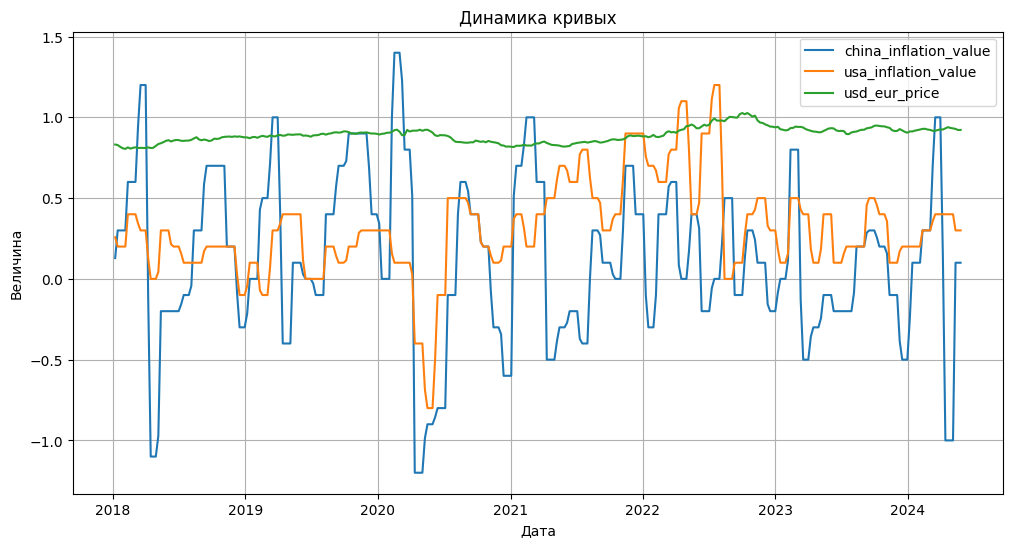

In [82]:
plt.figure(figsize=(12, 6))
for column in ['china_inflation_value', 'usa_inflation_value', 'usd_eur_price']:
    plt.plot(dataset_per_week.index, dataset_per_week[column], label=column)

plt.title('Динамика кривых')
plt.xlabel('Дата')
plt.ylabel('Величина')
plt.legend()
plt.grid(True)
plt.show()

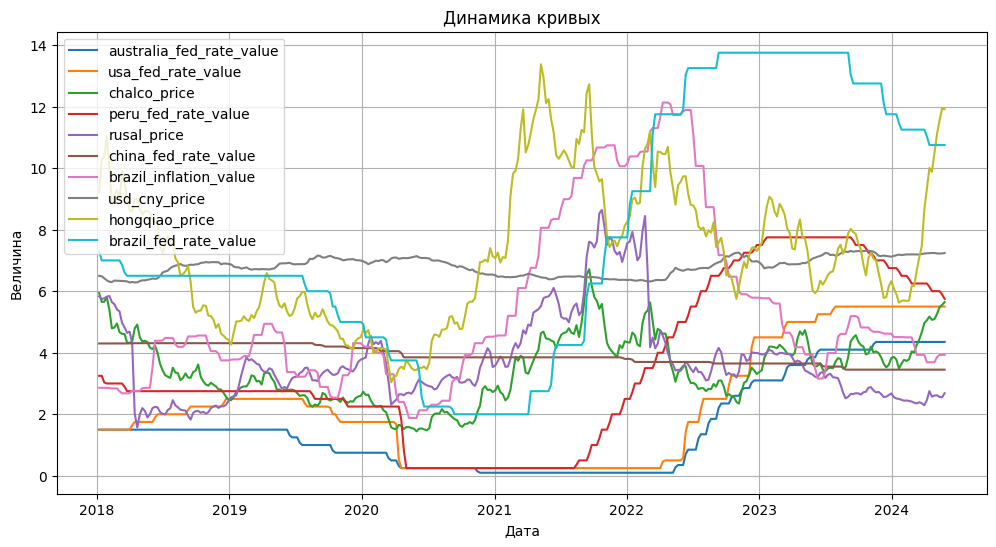

In [84]:
plt.figure(figsize=(12, 6))
for column in ["australia_fed_rate_value", "usa_fed_rate_value", "chalco_price", "peru_fed_rate_value",
               "rusal_price", "china_fed_rate_value", "brazil_inflation_value", 
               "usd_cny_price", "hongqiao_price", "brazil_fed_rate_value"]:
    plt.plot(dataset_per_week.index, dataset_per_week[column], label=column)

plt.title('Динамика кривых')
plt.xlabel('Дата')
plt.ylabel('Величина')
plt.legend()
plt.grid(True)
plt.show()

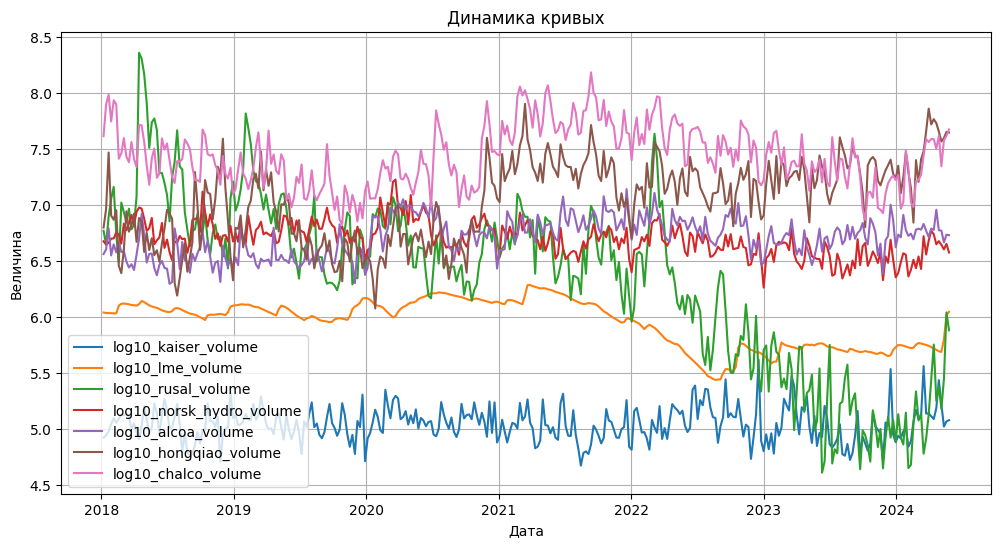

In [85]:
plt.figure(figsize=(12, 6))
for column in ["log10_kaiser_volume", "log10_lme_volume", "log10_rusal_volume",
               "log10_norsk_hydro_volume", "log10_alcoa_volume", "log10_hongqiao_volume",
               "log10_chalco_volume"]:
    plt.plot(dataset_per_week.index, dataset_per_week[column], label=column)

plt.title('Динамика кривых')
plt.xlabel('Дата')
plt.ylabel('Величина')
plt.legend()
plt.grid(True)
plt.show()

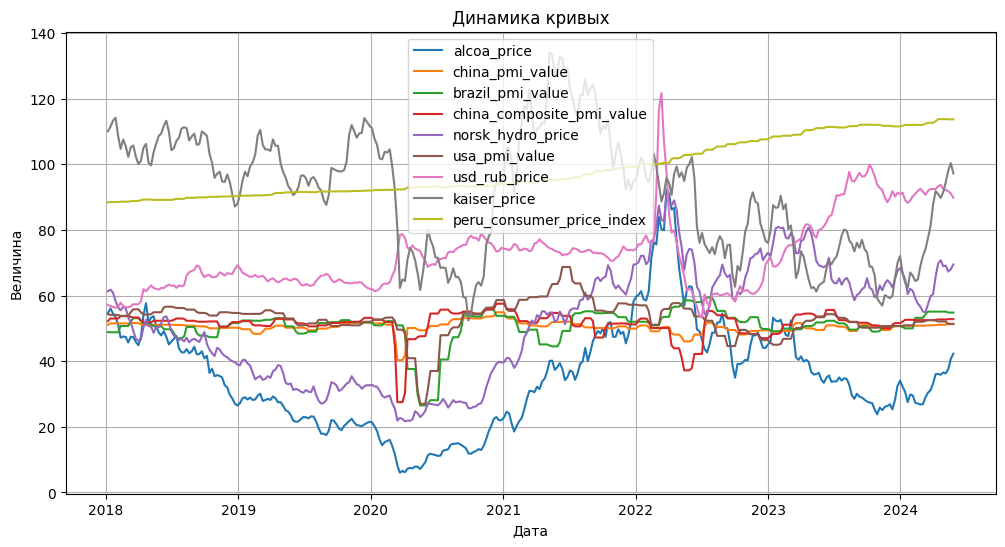

In [88]:
plt.figure(figsize=(12, 6))
for column in ["alcoa_price", "china_pmi_value", "brazil_pmi_value", "china_composite_pmi_value",
               "norsk_hydro_price", "usa_pmi_value", "usd_rub_price",
               "kaiser_price", "peru_consumer_price_index"]:
    plt.plot(dataset_per_week.index, dataset_per_week[column], label=column)

plt.title('Динамика кривых')
plt.xlabel('Дата')
plt.ylabel('Величина')
plt.legend()
plt.grid(True)
plt.show()

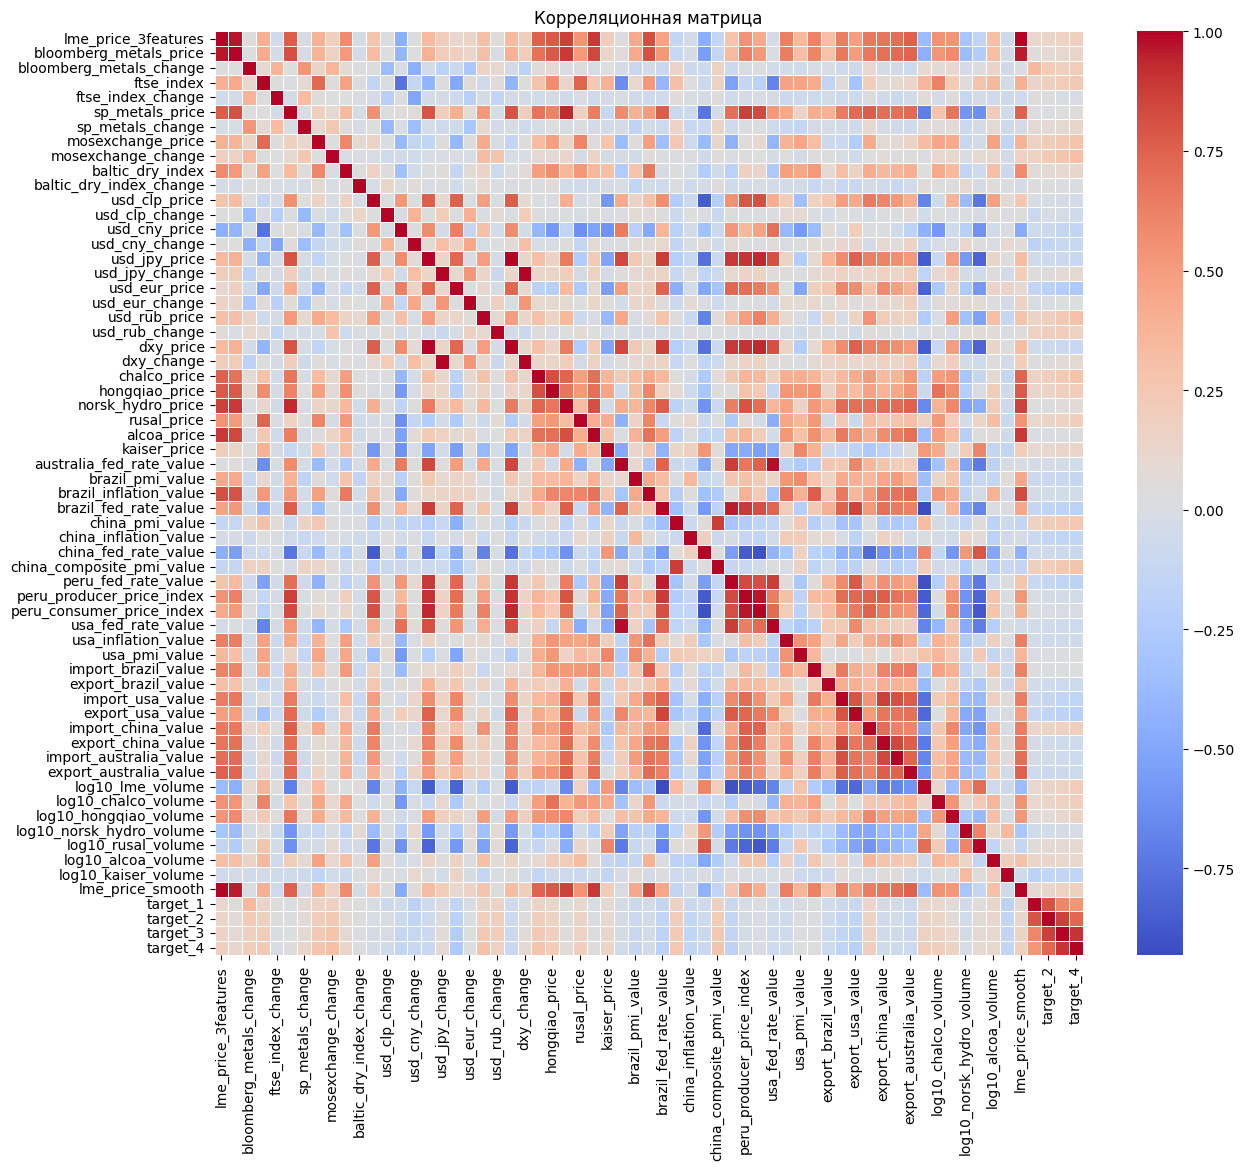

In [89]:
# Вычисление корреляции Пирсона между величинами
correlation_matrix = dataset_per_week.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

In [90]:
t = dataset_per_week.corr(method='spearman') # Посмотрим корреляцию Спирмена
t.lme_price_smooth[abs(t.lme_price_smooth)>0.5].sort_values()

peru_consumer_price_index    0.516664
brazil_fed_rate_value        0.521764
baltic_dry_index             0.536564
peru_producer_price_index    0.558738
usa_inflation_value          0.567521
log10_chalco_volume          0.567814
usd_jpy_price                0.571936
dxy_price                    0.571936
log10_hongqiao_volume        0.577361
export_usa_value             0.609742
import_brazil_value          0.650235
export_brazil_value          0.650446
export_china_value           0.689089
import_china_value           0.709112
import_australia_value       0.722294
brazil_inflation_value       0.749987
import_usa_value             0.797155
chalco_price                 0.799431
export_australia_value       0.804029
sp_metals_price              0.811072
hongqiao_price               0.852719
alcoa_price                  0.864355
norsk_hydro_price            0.889280
bloomberg_metals_price       0.953166
lme_price_3features          0.994378
lme_price_smooth             1.000000
Name: lme_pr

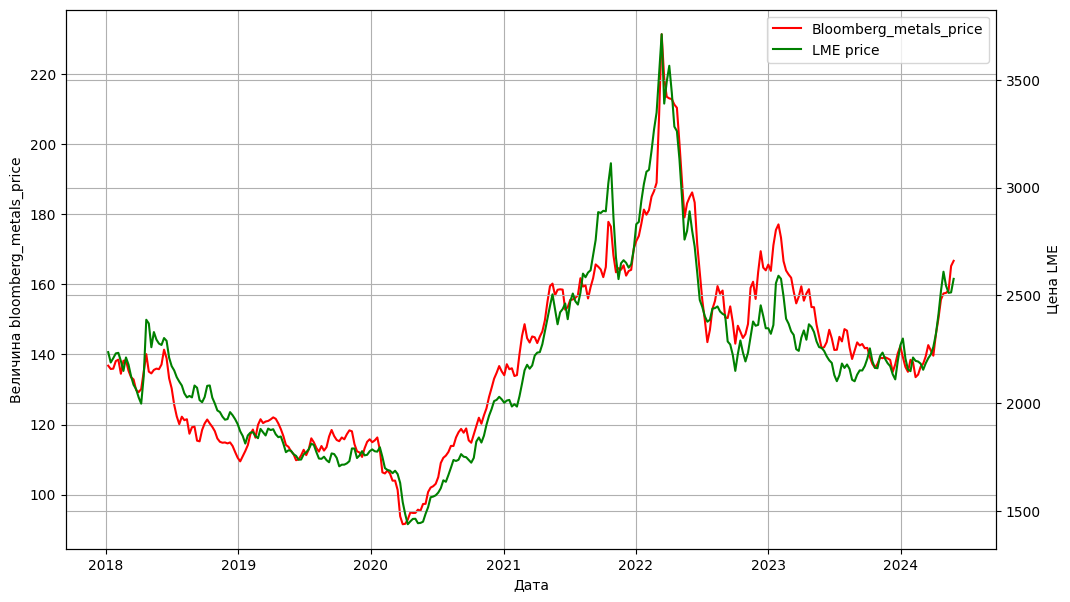

In [91]:
fig, ax = plt.subplots(figsize=(12, 7))
l1, = ax.plot(dataset_per_week.index, dataset_per_week.bloomberg_metals_price.values, color='r')
ax1 = ax.twinx()
l2, = ax1.plot(dataset_per_week.index, dataset_per_week.lme_price_smooth.values, color='g')
ax1.legend([l1,l2],['Bloomberg_metals_price', 'LME price'])
#ax.set_ylim(-2.5,2.5)
ax.set_ylabel('Величина bloomberg_metals_price')
ax.grid(True)
#ax1.set_ylim(-500,500)
ax1.set_ylabel('Цена LME')
ax1.grid(True)
ax.set_xlabel('Дата');

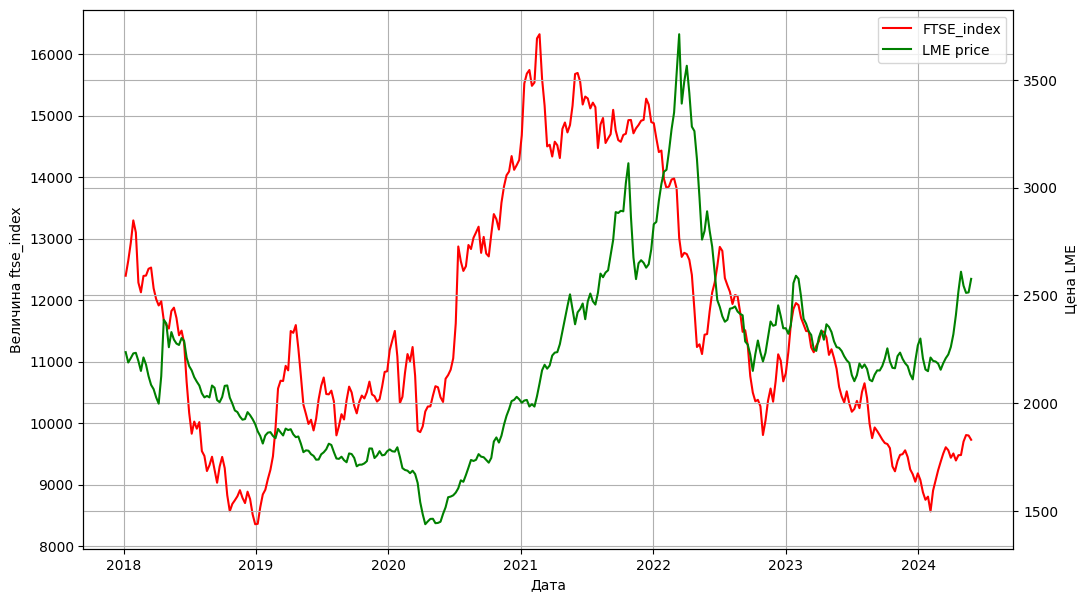

In [92]:
fig, ax = plt.subplots(figsize=(12, 7))
l1, = ax.plot(dataset_per_week.index, dataset_per_week.ftse_index.values, color='r')
ax1 = ax.twinx()
l2, = ax1.plot(dataset_per_week.index, dataset_per_week.lme_price_smooth.values, color='g')
ax1.legend([l1,l2],['FTSE_index', 'LME price'])
#ax.set_ylim(-2.5,2.5)
ax.set_ylabel('Величина ftse_index')
ax.grid(True)
#ax1.set_ylim(-500,500)
ax1.set_ylabel('Цена LME')
ax1.grid(True)
ax.set_xlabel('Дата');

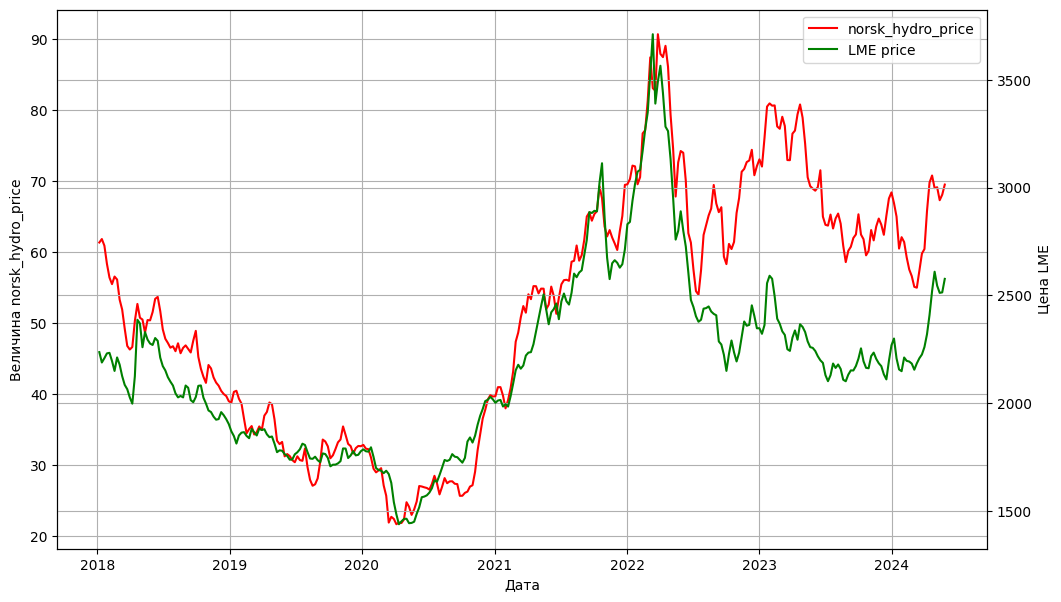

In [93]:
fig, ax = plt.subplots(figsize=(12, 7))
l1, = ax.plot(dataset_per_week.index, dataset_per_week.norsk_hydro_price.values, color='r')
ax1 = ax.twinx()
l2, = ax1.plot(dataset_per_week.index, dataset_per_week.lme_price_smooth.values, color='g')
ax1.legend([l1,l2],['norsk_hydro_price', 'LME price'])
#ax.set_ylim(-5,5)
ax.set_ylabel('Величина norsk_hydro_price')
ax.grid(True)
#ax1.set_ylim(-500,500)
ax1.set_ylabel('Цена LME')
ax1.grid(True)
ax.set_xlabel('Дата');

In [94]:
dataset_per_week

lme_price_3features  bloomberg_metals_price  \
date                                                      
2018-01-07          2238.892857              136.798214   
2018-01-14          2199.642857              135.854286   
2018-01-21          2224.642857              135.947143   
2018-01-28          2236.785714              138.122857   
2018-02-04          2225.500000              138.518571   
...                         ...                     ...   
2024-04-28          2599.500000              157.404286   
2024-05-05          2559.178571              157.558571   
2024-05-12          2548.964286              158.235714   
2024-05-19          2582.571429              165.225714   
2024-05-26          2656.071429              166.702143   

            bloomberg_metals_change    ftse_index  ftse_index_change  \
date                                                                   
2018-01-07                -0.508929  12396.915714           0.779643   
2018-01-14                 0.073214  12639.668571           0.477143   
2018-01-21                 0.044643  12928.584286           0.560000   
2018-01-28                 0.311429  13296.157143           0.238571   
2018-02-04                -0.174286  13099.915714          -0.212857   
...                             ...           ...                ...   
2024-04-28                 0.135714   9481.167857           0.506786   
2024-05-05                 0.287143   9700.185000           1.138929   
2024-05-12                 0.340000   9806.114286           0.248571   
2024-05-19                 1.517143   9799.045714           0.217143   
2024-05-26                -0.091071   9729.788571          -0.361429   

            sp_metals_price  sp_metals_change  mosexchange_price  \
date                                                               
2018-01-07      1883.810714          1.123571        5963.855500   
2018-01-14      1923.292857          0.219286        6033.078929   
2018-01-21      1931.792857         -0.132143        6065.811429   
2018-01-28      1943.928571          0.051429        6070.498571   
2018-02-04      1826.000000         -2.228571        6013.531429   
...                     ...               ...                ...   
2024-04-28      3090.057143          0.231429        8891.370000   
2024-05-05      3091.628571          0.231429        8854.146429   
2024-05-12      3147.028571          0.118571        8946.301429   
2024-05-19      3240.014286          1.007143        9109.045714   
2024-05-26      3268.403571          0.170357        9035.395714   

            mosexchange_change  baltic_dry_index  baltic_dry_index_change  \
date                                                                        
2018-01-07            0.856857       1314.623377                -0.723117   
2018-01-14            0.237143       1324.428571                -1.400000   
2018-01-21            0.362857       1166.714286                -1.927143   
2018-01-28           -0.177143       1193.571429                 1.127143   
2018-02-04           -0.284286       1134.714286                -1.925714   
...                        ...               ...                      ...   
2024-04-28           -0.024286       1761.285714                -2.021429   
2024-05-05           -0.128571       1802.035714                 3.484286   
2024-05-12            0.567857       2115.321429                 2.634286   
2024-05-19            0.268571       1900.000000                -1.768571   
2024-05-26           -1.070000       1808.178571                -0.432143   

            usd_clp_price  usd_clp_change  usd_cny_price  usd_cny_change  \
date                                                                       
2018-01-07     607.361429       -0.228571       6.496214       -0.025714   
2018-01-14     605.478571       -0.101429       6.484643       -0.191429   
2018-01-21     606.205714        0.091429       6.421286       -0.158571   
2018-01-28     603.757143       -0.02857

In [95]:
dataset_per_week.to_csv('../data/processed/dataset_per_week.csv')

In [96]:
df = pd.read_csv('../data/processed/dataset_per_week.csv', parse_dates=True, index_col=0)
df.shape

(334, 63)